# 概率图
APOC 基于 [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) 和 [sklearn](https://scikit-learn.org/stable/)。

让我们从加载一个示例图像和一些地面真相开始：

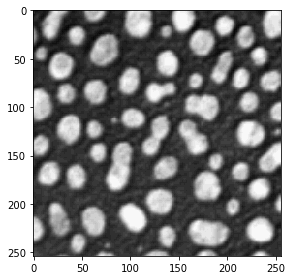

In [1]:
from skimage.io import imread, imshow, imsave
import matplotlib.pyplot as plt
import numpy as np
import apoc

image = imread('blobs.tif')
imshow(image)

In [2]:
do_manual_annotation = False

if do_manual_annotation: # you can use this to make manual annotations
    import napari

    # start napari
    viewer = napari.Viewer()
    napari.run()

    # add image
    viewer.add_image(image)

    # add an empty labels layer and keep it in a variable
    labels = np.zeros(image.shape).astype(int)
    viewer.add_labels(labels)
    
else:
    labels = imread('annotations_3class.tif')

C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


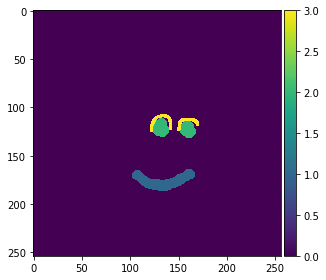

In [3]:
manual_annotations = labels
if do_manual_annotation:
    imsave('annotations_3class.tif', manual_annotations)

from skimage.io import imshow
imshow(manual_annotations, vmin=0, vmax=3)

## 训练
现在我们训练一个PixelClassifier，它在底层是一个[scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)。训练后，分类器将被转换为[与clij兼容的OpenCL代码](https://github.com/clEsperanto/clij-opencl-kernels)，并以给定的文件名保存到磁盘。

In [4]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'my_model.cl'

output_probability_of_class = 3

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

## 预测
然后可以使用分类器对给定图像中的所有像素进行分类。起点仍然是特征堆栈。因此，用户必须确保在训练和预测时使用相同的特征。

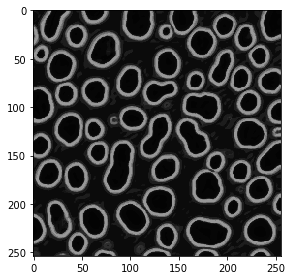

In [5]:
result = clf.predict(image=image)
imshow(result)

## 对其他类别进行训练/预测
我们现在将再次训练并输出另一个类别的概率

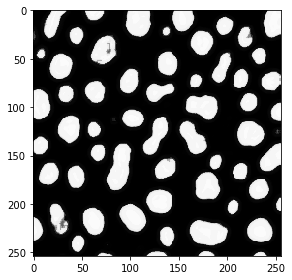

In [6]:
output_probability_of_class = 2

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

result = clf.predict(image=image)
imshow(result)

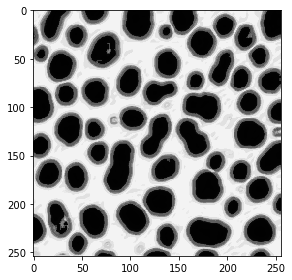

In [7]:
output_probability_of_class = 1

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

result = clf.predict(image=image)
imshow(result)